In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_with_preprocessing_labelencoder_standadscaler', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (990755, 78)
X teste =  (424610, 78)
y multiclasse treino =  (990755,)
y multiclasse teste =  (424610,)
y binário treino =  (990755,)
y binário teste =  (424610,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[-0.42791604, -0.45373111, -0.01142668, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       [ 2.25829885, -0.45548439, -0.01142668, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       [-0.42791604, -0.45548027, -0.01018454, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       ...,
       [-0.05968811, -0.45449748, -0.01018454, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       [-0.42655148, -0.45548123, -0.01018454, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       [-0.42771136,  2.01339365, -0.00397384, ..., -0.11272097,
         3.09012274,  3.22683285]])

In [6]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1008718    BENIGN
1092907    BENIGN
1034897    BENIGN
727692     BENIGN
1200733    BENIGN
            ...  
259178     BENIGN
1414414    BENIGN
131932     BENIGN
671155     BENIGN
121958        DoS
Name: Label_multiclass, Length: 990755, dtype: object
1008718    0
1092907    0
1034897    0
727692     0
1200733    0
          ..
259178     0
1414414    0
131932     0
671155     0
121958     1
Name: Label_binary, Length: 990755, dtype: int64


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [10]:
with open('df_cic_test50_with_preprocessing_labelencoder_standadscaler', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [11]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1415365, 78)
y multiclasse =  (1415365,)
y binário =  (1415365,)


In [12]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [14]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [16]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [17]:
#X_test50.head()
X_test50

array([[-0.42771136, -0.4436968 , -0.0089424 , ..., -0.11272097,
        -0.3657596 , -0.34745121],
       [-0.42791604, -0.45371527, -0.01018454, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       [-0.42423172, -0.45458582, -0.01018454, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       ...,
       [-0.42791604, -0.45358734, -0.01018454, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       [ 2.16052775, -0.45442345, -0.01018454, ..., -0.11272097,
        -0.3657596 , -0.34745121],
       [-0.31110926, -0.45548355, -0.01142668, ..., -0.11272097,
        -0.3657596 , -0.34745121]])

In [18]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'PortScan']
[0 0 0 ... 0 0 1]


# Algoritmo RandomForest para Train e Validation - Train50

In [19]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [20]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [21]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [22]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [23]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9930689338451756

### Visualização da árvore binária

In [26]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

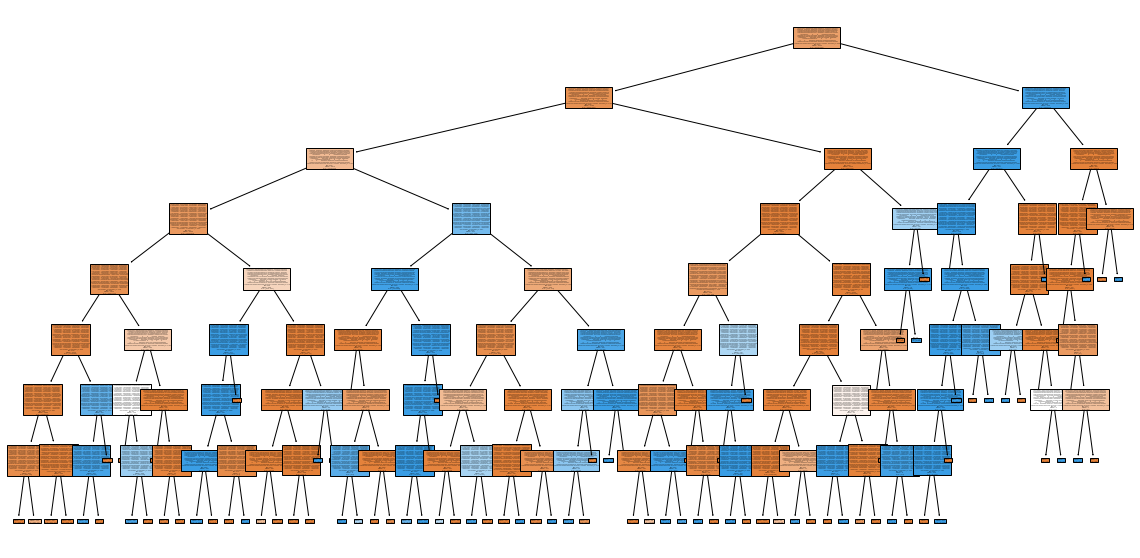

In [27]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [28]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [29]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [30]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [31]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [32]:
predict_train50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [33]:
y_train50_multiclass_test

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [34]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9926497256305786

### Visualização da árvore multiclasse

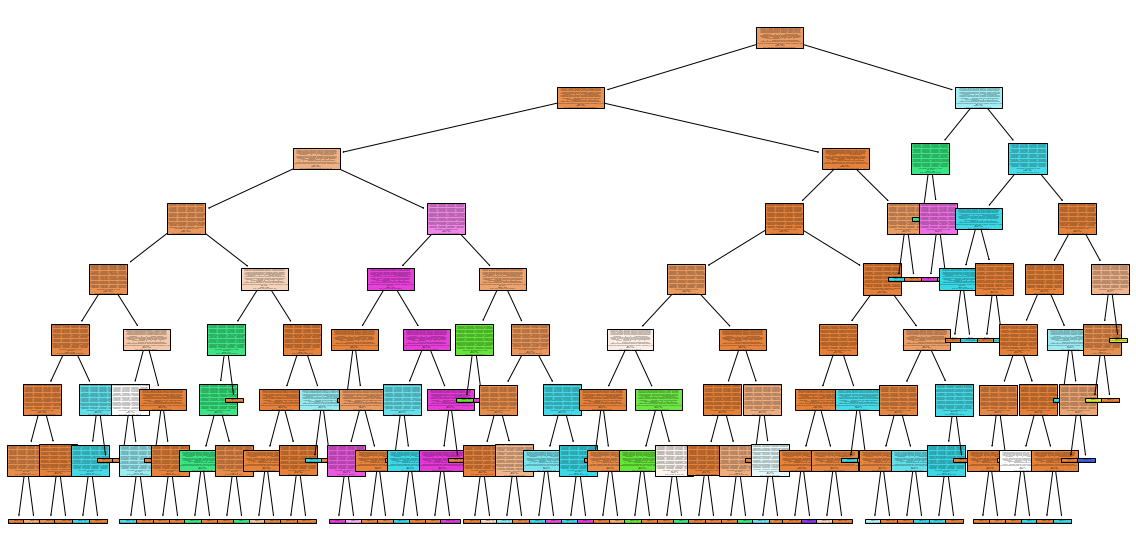

In [35]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [36]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [37]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.991635  0.999804  0.995702    340989
           1   0.999171  0.965607  0.982102     83621

    accuracy                       0.993069    424610
   macro avg   0.995403  0.982705  0.988902    424610
weighted avg   0.993119  0.993069  0.993024    424610



In [38]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.991070  0.999856  0.995444    340989
      BotNet   1.000000  0.009615  0.019048       312
  BruteForce   1.000000  0.997611  0.998804      2093
        DDoS   0.998956  0.997966  0.998460     19171
         DoS   0.999186  0.941273  0.969365     37836
  Heartbleed   1.000000  1.000000  1.000000         1
Infiltration   1.000000  0.000000  0.000000         5
    PortScan   1.000000  0.992715  0.996344     23885
   WebAttack   1.000000  0.000000  0.000000       318

    accuracy                       0.992650    424610
   macro avg   0.998801  0.659893  0.664163    424610
weighted avg   0.992709  0.992650  0.991849    424610



### Cross Validation do train50

In [39]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [40]:
score_cv_train50_binary

array([0.99294481, 0.99282369, 0.99298518, 0.9956599 , 0.99554887,
       0.99282362, 0.99267222, 0.99284381, 0.99312642, 0.9931567 ])

In [41]:
cv_result_train50_binary

[0.9934585213601281]

In [42]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [43]:
score_cv_train50_multiclass

array([0.9925108 , 0.99245024, 0.99271267, 0.99283378, 0.99279341,
       0.99248044, 0.99226848, 0.99245016, 0.99280343, 0.992541  ])

In [44]:
cv_result_train50_multiclass

[0.9925844427949528]

### Matriz de Confusão do train50

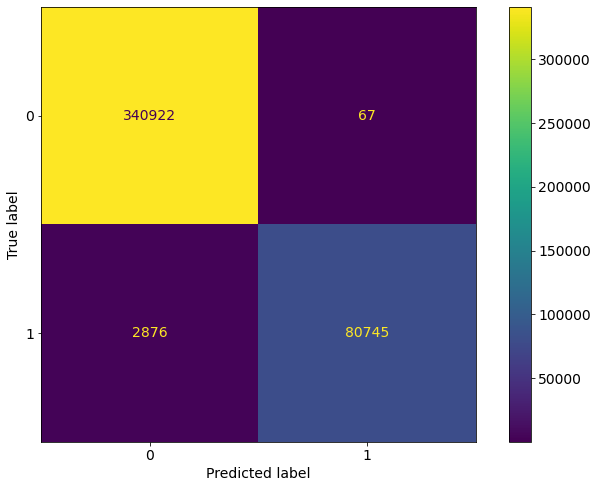

In [45]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

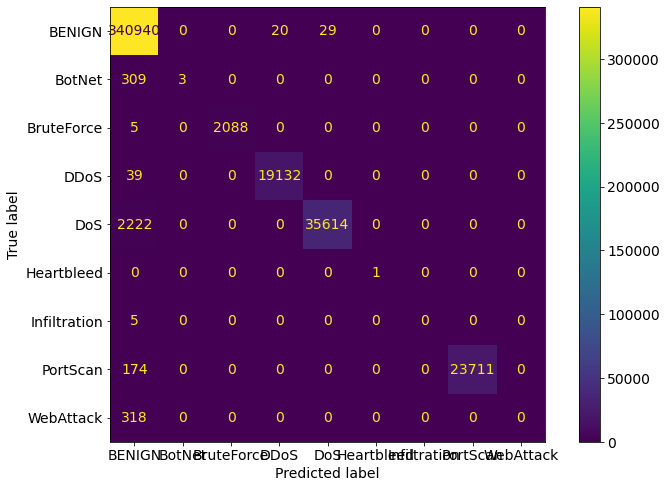

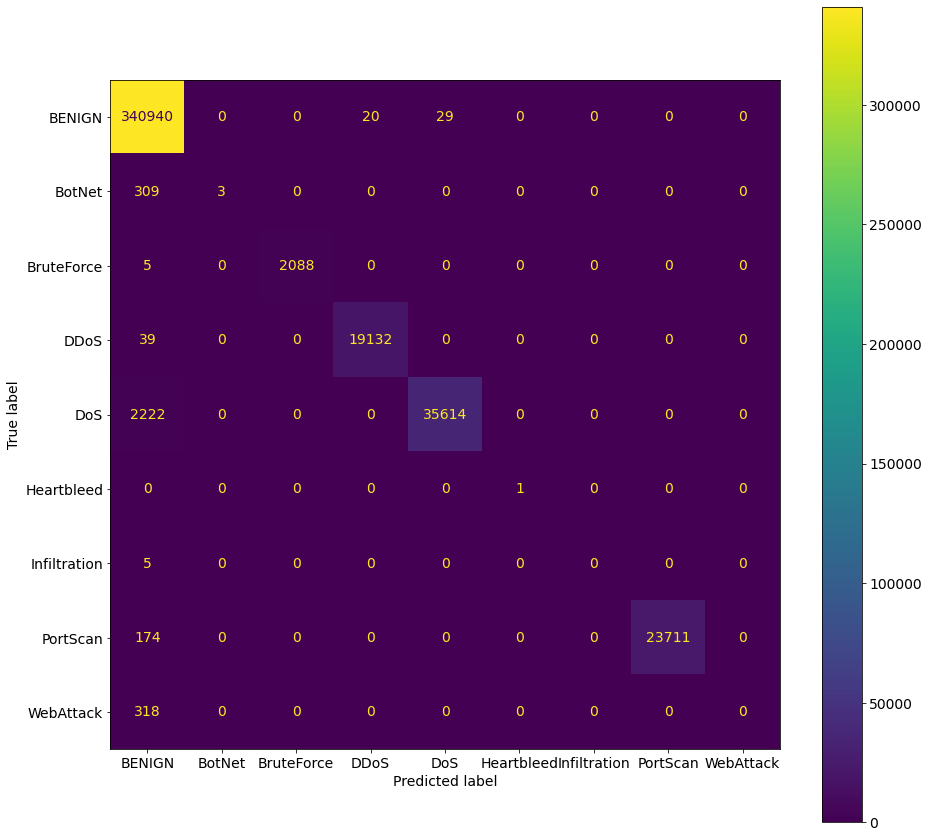

In [46]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [47]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [48]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [49]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [50]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9929996855934689

### Predição test50 multiclasse

In [51]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [52]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [53]:
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [54]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9926174520353407

### Precision e Recall do test50

In [55]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.991540  0.999813  0.995659   1136548
           1   0.999213  0.965225  0.981925    278817

    accuracy                       0.993000   1415365
   macro avg   0.995376  0.982519  0.988792   1415365
weighted avg   0.993051  0.993000  0.992954   1415365



In [56]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.991021  0.999865  0.995424   1136548
      BotNet   1.000000  0.021385  0.041874       982
  BruteForce   1.000000  0.998699  0.999349      6917
        DDoS   0.999312  0.997907  0.998609     64013
         DoS   0.999083  0.940165  0.968729    126330
  Heartbleed   1.000000  1.000000  1.000000         5
Infiltration   1.000000  0.000000  0.000000        17
    PortScan   1.000000  0.993368  0.996673     79464
   WebAttack   1.000000  0.000000  0.000000      1089

    accuracy                       0.992617   1415365
   macro avg   0.998824  0.661265  0.666740   1415365
weighted avg   0.992677  0.992617  0.991835   1415365



### Matriz de Confusão do test50

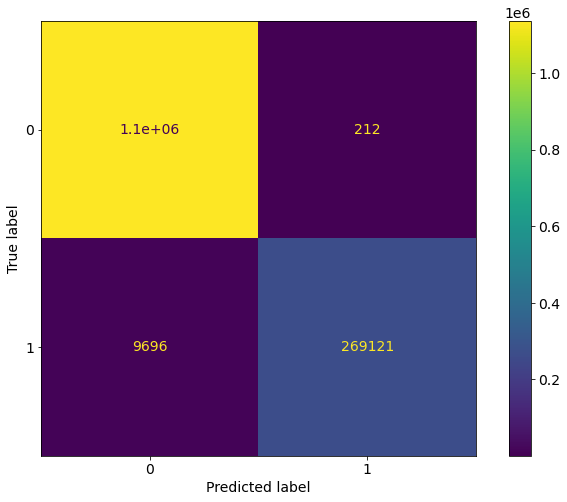

In [57]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

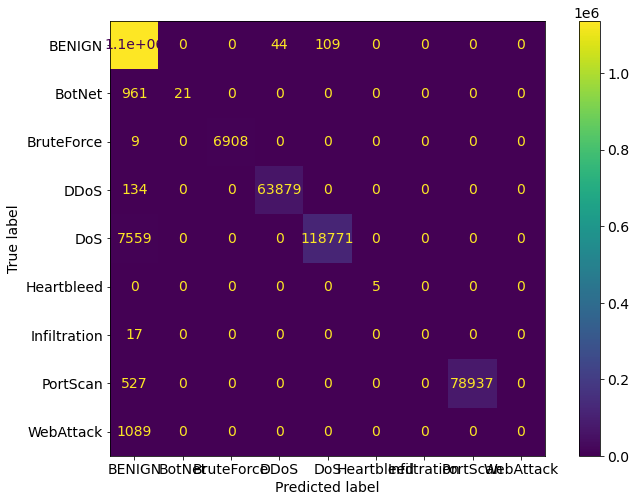

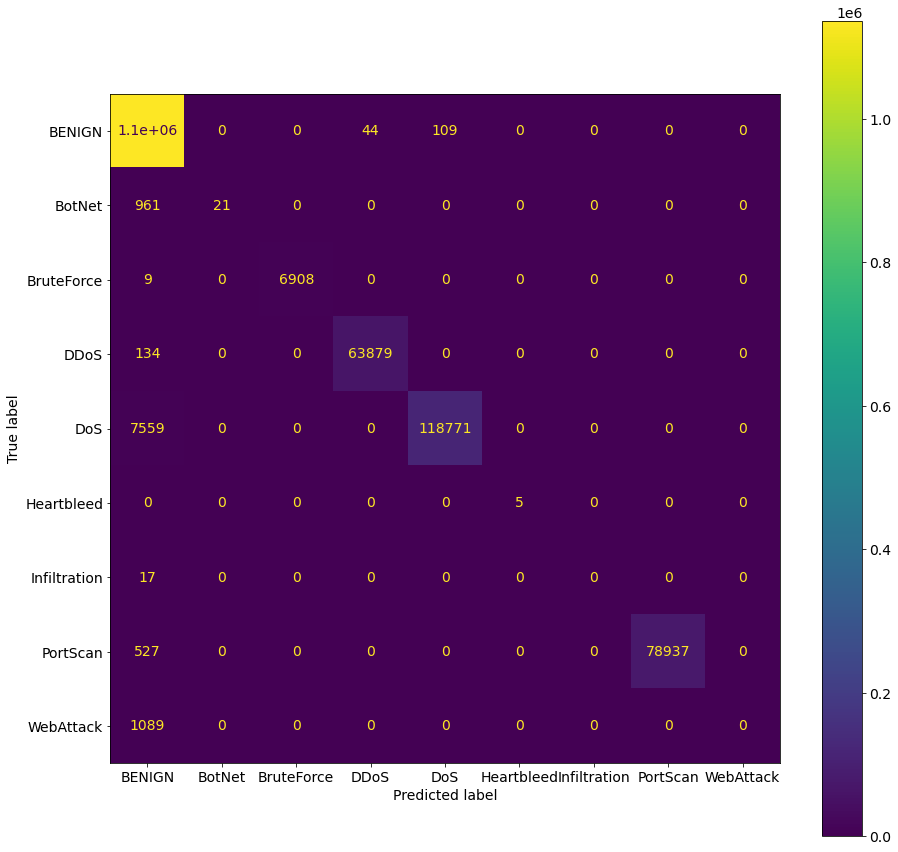

In [58]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)